In [1]:
import pandas as pd
import os, shutil
import tensorflow as tf
import IPython.display as display
import numpy as np
import time
import functools
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
import time

# Loading in Images

A string of thie file path containing the chest x-ray training data is assigned to DATADIR. Within the file path or the two folders. One folder has normal chest xray photos and another folder has chest xrays of people with pneumonia.

In [3]:
DATADIR = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/CellData/chest_xray/train'
CATEGORIES = ['NORMAL', 'PNEUMONIA']

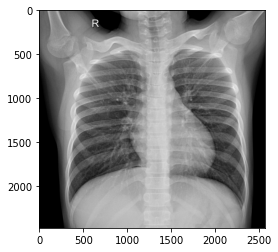

In [4]:
#iterate through all images in the two folders
for category in CATEGORIES: 
    path = os.path.join(DATADIR, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

# Train Test Split

An index based for loop matches a photo to a category (normal or pneumonia). All the images matched with a 0 or 1 and added to the training data list.

In [5]:
training_data = []

for i in range(len(CATEGORIES)):
    category = CATEGORIES[i]
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        training_data.append([img_array, i])

In [6]:
print(len(training_data))

5233


In [7]:
count_pneumonia = 0
count_normal = 0 
for image in training_data:
    if image[1] == 0:
        count_normal += 1
    else:
         count_pneumonia +=1
print('Normal:', count_normal, 'Pneumonia:', count_pneumonia)

Normal: 1349 Pneumonia: 3884


Far more pictures of xrays with pneumonia patients than those without pneumonia. 

In [7]:
import random
random.shuffle(training_data)

In [36]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)

<ipython-input-36-21f43c1d1b0c>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array(X)


In [37]:
y = np.array(y)
X = X/225.0
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) #rectified linear
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.2)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

# From Notes

In [8]:
data_all = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        DATADIR, 
        target_size=(224, 224), 
        batch_size = 5232, 
        seed = 123) 

Found 5232 images belonging to 2 classes.


In [9]:
#split images and labels
images, labels = next(data_all)

In [10]:
images[0][0][0]

array([0.12156864, 0.12156864, 0.12156864], dtype=float32)

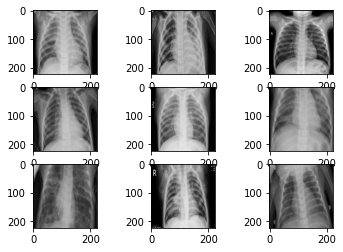

In [35]:
#visualize images
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(images[i])
plt.show()

In [14]:
#reshape labels

labels = np.reshape(labels[:,0], (5232,1))

In [15]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

## Convolutional neural network

In [17]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

NameError: name 'models' is not defined

In [18]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=50,
                    validation_data=(X_val, y_val))

NameError: name 'cnn' is not defined

In [19]:
hist_cnn = cnn1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'cnn1' is not defined

In [20]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

NameError: name 'cnn' is not defined

# Based on Labs

- Files are stored in Pneumonia and Normal
- Work with train, validation, and test

In [3]:
import os, shutil

- Create normal and pneumonia folders for split, train, validation
- split with split the dataset in three groups (train, test, validation)

In [12]:
# data_normal_dir = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/CellData/chest_xray/NORMAL/'
# data_pneumonia = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/CellData/chest_xray/PNEUMONIA'
# new_dir = 'split/'

In [4]:
data_train_dir = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/CellData/chest_xray/train/'
data_test_dir = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/CellData/chest_xray/test/'
split_dir = 'split/'

In [6]:
imgs_normal = [file for file in os.listdir(data_train_dir) if file.endswith('jpeg')]